<a href="https://colab.research.google.com/github/PisanoRaffaele/Lab_AI/blob/main/rp-es6_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio 3
Task 1: Ripetete l'esercizio 2, questa volta applicato al dataset MNIST.

Task 2: Visualizzate i coefficienti del modello ottenuto per ogni classe.

In [1]:
from pathlib import Path
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Caricamento del dataset

In [2]:
class MNISTDataset:
    def __init__(self, train_size=60000, test_size=10000):
        # load data
        mnist = fetch_openml('mnist_784', version=1, cache=True, data_home=Path('data/openml'))
        mnist.target = mnist.target.astype(int)
        # mnist test data is in the last 10k samples
        self.train_x = mnist.data[:train_size]
        self.train_y = mnist.target[:train_size]
        self.test_x = mnist.data[-test_size:]
        self.test_y = mnist.target[-test_size:]
        # normalize data
        self.train_x = self.train_x / 255.0
        self.test_x = self.test_x / 255.0

    def get_train_data(self):
        return self.train_x, self.train_y

    def get_test_data(self):
        return self.test_x, self.test_y


# Load MNIST data
mnist = MNISTDataset()
test_x, test_y = mnist.get_test_data()
train_x, train_y = mnist.get_train_data()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Task 1

In [3]:
# Train logistic regression model
# Tip: use multi_class='multinomial'
model = LogisticRegression(multi_class='multinomial')

In [4]:
model.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [5]:
# Predict on test set
pred_y = model.predict(test_x)

In [6]:
# Evaluate accuracy
accuracy = accuracy_score(test_y, pred_y)
print("acc: " + str(accuracy))

acc: 0.9258


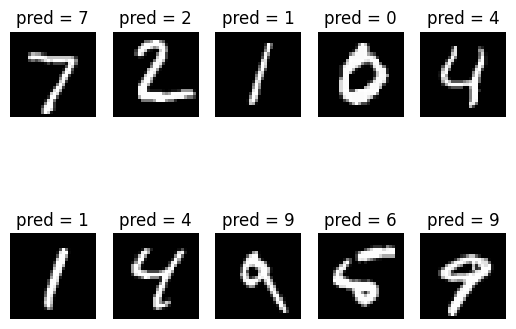

In [7]:
# Plot some predictions
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[i * 5 + j, :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[i * 5 + j]))
        axes[i, j].axis('off')
plt.show()

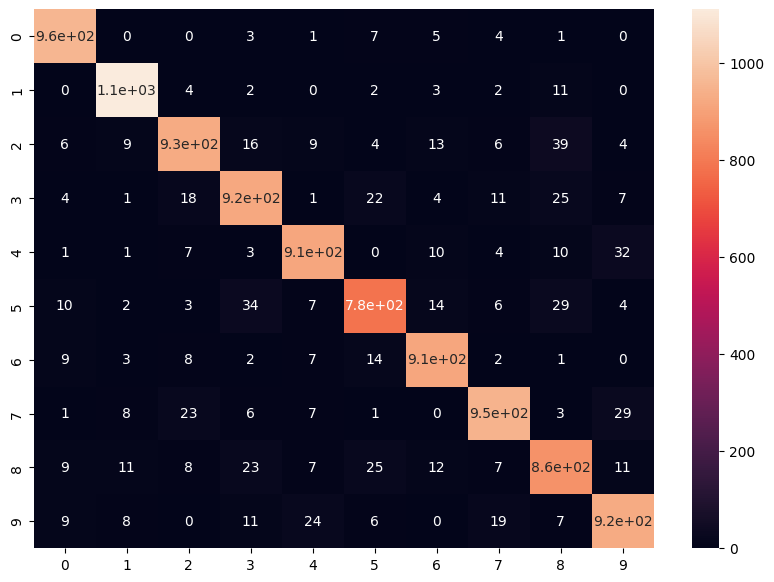

In [8]:
# Plot confusion matrix
cm = confusion_matrix(test_y, pred_y)
df_cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.show()

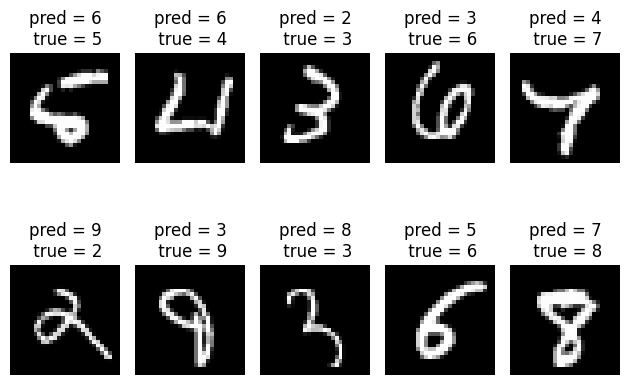

In [9]:
# Plot some misclassified samples and their true labels
misclassified = np.where(pred_y != test_y)[0]
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[misclassified[i * 5 + j], :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[misclassified[i * 5 + j]]) + '\n true = ' + str(test_y.iloc[misclassified[i * 5 + j]]))
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

### Task 2

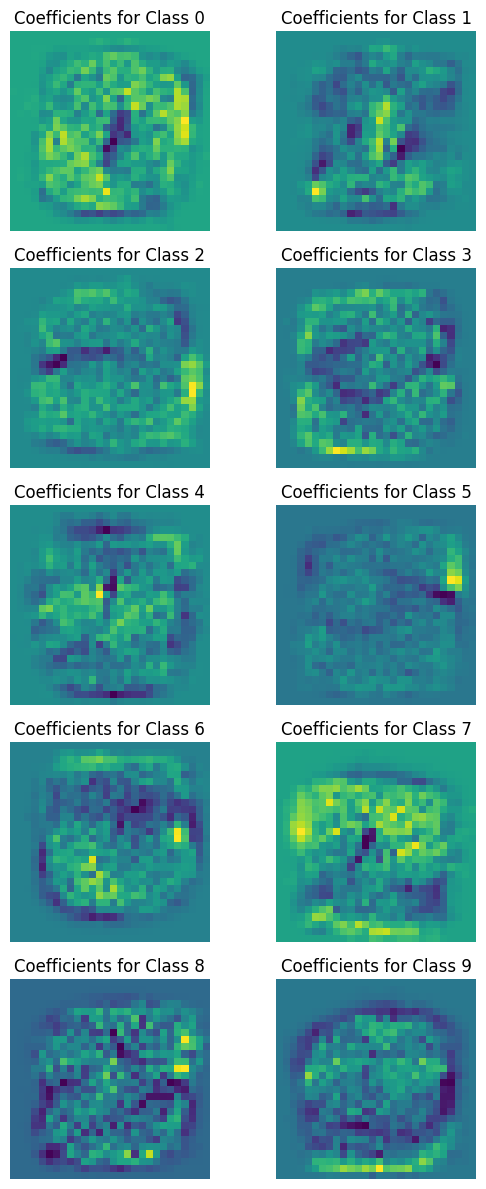

In [10]:
import matplotlib.pyplot as plt

image_width = 28
image_height = 28
n_classes = 10

# Reshape coefficients for each class into image shape
coef_images = model.coef_.reshape(-1, image_width, image_height)

# Plot coefficient images for each class
fig, axes = plt.subplots(5, 2, figsize=(6, 12))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(coef_images[i])
    ax.set_title(f"Coefficients for Class {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()